In [1]:
using DrWatson
@quickactivate

In [2]:
projectname()

"NowcastingHuascaran"

In [5]:
include(srcdir("goes.jl"))
include(srcdir("grids.jl"))
include(srcdir("netcdf.jl"))

collect_datasets (generic function with 1 method)

In [6]:
using Geodesy, GMT, Serialization

In [7]:
using Markdown

In [8]:
product_str = "|" * sprint(show_products; context=:compact => true)
product_str = replace(product_str, '\t' => "|")
product_str = replace(product_str, '\n' => "|\n")
Markdown.parse(product_str)

|         goes16 |         goes17 |
| --------------:| --------------:|
|   ABI-L1b-RadC |   ABI-L1b-RadC |
|   ABI-L1b-RadF |   ABI-L1b-RadF |
|   ABI-L1b-RadM |   ABI-L1b-RadM |
|   ABI-L2-ACHAC |   ABI-L2-ACHAC |
|   ABI-L2-ACHAF |   ABI-L2-ACHAF |
|   ABI-L2-ACHAM |   ABI-L2-ACHAM |
|   ABI-L2-ACHTF |   ABI-L2-ACHTF |
|   ABI-L2-ACHTM |   ABI-L2-ACHTM |
|    ABI-L2-ACMC |    ABI-L2-ACMC |
|    ABI-L2-ACMF |    ABI-L2-ACMF |
|    ABI-L2-ACMM |    ABI-L2-ACMM |
|   ABI-L2-ACTPC |   ABI-L2-ACTPC |
|   ABI-L2-ACTPF |   ABI-L2-ACTPF |
|   ABI-L2-ACTPM |   ABI-L2-ACTPM |
|    ABI-L2-ADPC |    ABI-L2-ADPC |
|    ABI-L2-ADPF |    ABI-L2-ADPF |
|    ABI-L2-ADPM |    ABI-L2-ADPM |
|   ABI-L2-AICEF |   ABI-L2-AICEF |
|   ABI-L2-AITAF |   ABI-L2-AITAF |
|    ABI-L2-AODC |    ABI-L2-AODC |
|    ABI-L2-AODF |    ABI-L2-AODF |
|    ABI-L2-BRFC |    ABI-L2-BRFC |
|    ABI-L2-BRFF |    ABI-L2-BRFF |
|    ABI-L2-BRFM |    ABI-L2-BRFM |
|   ABI-L2-CMIPC |   ABI-L2-CMIPC |
|   ABI-L2-CMIPF |   ABI-L2-CMIPF |
|   ABI-L2-CMIPM |   ABI-L2-CMIPM |
|    ABI-L2-CODC |    ABI-L2-CODC |
|    ABI-L2-CODF |    ABI-L2-CODF |
|    ABI-L2-CPSC |    ABI-L2-CPSC |
|    ABI-L2-CPSF |    ABI-L2-CPSF |
|    ABI-L2-CPSM |    ABI-L2-CPSM |
|    ABI-L2-CTPC |    ABI-L2-CTPC |
|    ABI-L2-CTPF |    ABI-L2-CTPF |
|    ABI-L2-DMWC |    ABI-L2-DMWC |
|    ABI-L2-DMWF |    ABI-L2-DMWF |
|    ABI-L2-DMWM |    ABI-L2-DMWM |
|   ABI-L2-DMWVC |   ABI-L2-DMWVC |
|   ABI-L2-DMWVF |   ABI-L2-DMWVF |
|   ABI-L2-DMWVM |   ABI-L2-DMWVM |
|    ABI-L2-DSIC |    ABI-L2-DSIC |
|    ABI-L2-DSIF |    ABI-L2-DSIF |
|    ABI-L2-DSIM |    ABI-L2-DSIM |
|    ABI-L2-DSRC |    ABI-L2-DSRC |
|    ABI-L2-DSRF |    ABI-L2-DSRF |
|    ABI-L2-DSRM |    ABI-L2-DSRM |
|    ABI-L2-FDCC |    ABI-L2-FDCC |
|    ABI-L2-FDCF |    ABI-L2-FDCF |
|    ABI-L2-FDCM |    ABI-L2-FDCM |
|    ABI-L2-LSAC |    ABI-L2-LSAC |
|    ABI-L2-LSAF |    ABI-L2-LSAF |
|    ABI-L2-LSAM |    ABI-L2-LSAM |
| ABI-L2-LST2KMF | ABI-L2-LST2KMF |
|    ABI-L2-LSTC |    ABI-L2-LSTC |
|    ABI-L2-LSTF |    ABI-L2-LSTF |
|    ABI-L2-LSTM |    ABI-L2-LSTM |
|   ABI-L2-LVMPC |   ABI-L2-LVMPC |
|   ABI-L2-LVMPF |   ABI-L2-LVMPF |
|   ABI-L2-LVMPM |   ABI-L2-LVMPM |
|   ABI-L2-LVTPC |   ABI-L2-LVTPC |
|   ABI-L2-LVTPF |   ABI-L2-LVTPF |
|   ABI-L2-LVTPM |   ABI-L2-LVTPM |
|  ABI-L2-MCMIPC |  ABI-L2-MCMIPC |
|  ABI-L2-MCMIPF |  ABI-L2-MCMIPF |
|  ABI-L2-MCMIPM |  ABI-L2-MCMIPM |
|  ABI-L2-RRQPEF |  ABI-L2-RRQPEF |
|    ABI-L2-RSRC |    ABI-L2-RSRC |
|    ABI-L2-RSRF |    ABI-L2-RSRF |
|    ABI-L2-SSTF |    ABI-L2-SSTF |
|    ABI-L2-TPWC |    ABI-L2-TPWC |
|    ABI-L2-TPWF |    ABI-L2-TPWF |
|    ABI-L2-TPWM |    ABI-L2-TPWM |
|    ABI-L2-VAAF |    ABI-L2-VAAF |
|  EXIS-L1b-SFEU |  EXIS-L1b-SFEU |
|  EXIS-L1b-SFXR |  EXIS-L1b-SFXR |
|    GLM-L2-LCFA |    GLM-L2-LCFA |
|   MAG-L1b-GEOF |   MAG-L1b-GEOF |
|  SEIS-L1b-EHIS |  SEIS-L1b-EHIS |
|  SEIS-L1b-MPSH |  SEIS-L1b-MPSH |
|  SEIS-L1b-MPSL |  SEIS-L1b-MPSL |
|  SEIS-L1b-SGPS |  SEIS-L1b-SGPS |
| SUVI-L1b-Fe093 | SUVI-L1b-Fe093 |
| SUVI-L1b-Fe131 | SUVI-L1b-Fe131 |
| SUVI-L1b-Fe171 | SUVI-L1b-Fe171 |
| SUVI-L1b-Fe195 | SUVI-L1b-Fe195 |
| SUVI-L1b-Fe284 | SUVI-L1b-Fe284 |
| SUVI-L1b-He303 | SUVI-L1b-He303 |


In [9]:
ayer = startofday(now() - Day(1))
ayer_str = Dates.format(ayer, "yyyymmdd")
save_dir = datadir("exp_raw", "GLM", ayer_str)

"/home/marco/Documents/VSCode/NowcastingHuascaran/data/exp_raw/GLM/20211114"

In [10]:
processed_path = datadir("exp_pro", "GLM", ayer_str * ".jls")

"/home/marco/Documents/VSCode/NowcastingHuascaran/data/exp_pro/GLM/20211114.jls"

In [11]:
if isfile(processed_path)
    fs = deserialize(processed_path)
else
    download_satellite_data("goes16", "GLM-L2-LCFA", ayer; 
        path=save_dir, show_progress=false)
    fs = collect_tostruct(save_dir)
    mkpath(dirname(processed_path))
    serialize(processed_path, fs)
end;

In [12]:
topleftcorner_lla = LLA(0.0, -84.0)
topleftcorner = UTM(topleftcorner_lla, 17, false, wgs84)

UTM(166021.4430805394, 1.0e7, 0.0)

In [13]:
flash_coords = [
    UTM(y, 17, false, wgs84) 
    for y in vcat([x.flash_coord for x in fs]...)
    if (-20 < y.lat < 0) && (-84 < y.lon < -66)
]

74427-element Vector{UTM{Float64}}:
 UTM(1.6557735135316649e6, 9.592307109353751e6, 0.0)
 UTM(1.8315532161205888e6, 8.02930351379706e6, 0.0)
 UTM(1.7197579545064622e6, 9.936961677504968e6, 0.0)
 UTM(1.6837027885195352e6, 8.206542306362703e6, 0.0)
 UTM(1.7979561366547456e6, 8.0918099800277e6, 0.0)
 UTM(1.7304532768409993e6, 8.445944529240565e6, 0.0)
 UTM(1.5371379428687058e6, 8.539117639031045e6, 0.0)
 UTM(1.670242942122733e6, 8.241108291328665e6, 0.0)
 UTM(1.7991358111352145e6, 8.134128411600941e6, 0.0)
 UTM(1.3992613094655154e6, 9.977392308304567e6, 0.0)
 UTM(1.3351517561220336e6, 9.827674213803774e6, 0.0)
 UTM(1.6922364991913664e6, 9.891717845328394e6, 0.0)
 UTM(1.7848989058298145e6, 8.093457313836428e6, 0.0)
 ⋮
 UTM(2.0311655801902083e6, 8.075207829636573e6, 0.0)
 UTM(2.0774946273843779e6, 8.074442914345689e6, 0.0)
 UTM(1.2261843987113885e6, 9.54297307702759e6, 0.0)
 UTM(1.2819416659050083e6, 8.454833646980137e6, 0.0)
 UTM(1.8723928594016836e6, 9.758341392118363e6, 0.0)
 UTM(1.92397

In [14]:
n = 650
grid = GeoGrid(topleftcorner, 2, zeros(n, n))
@time accumulate!(grid, flash_coords)

  0.307778 seconds (1.98 M allocations: 100.972 MiB, 98.65% compilation time)


22424

In [15]:
bottomrightcorner = UTM(
    topleftcorner.x + grid.spacialresolution * size(grid.grid, 1) * 1e3, 
    topleftcorner.y - grid.spacialresolution * size(grid.grid, 1) * 1e3,
    topleftcorner.z)
trans = LLAfromUTM(17, false, wgs84)
bottomrightcorner_lla = trans(bottomrightcorner)

LLA(lat=-11.623437413161636°, lon=-72.1705480525897°, alt=0.0)

In [16]:
region = [topleftcorner_lla.lon, bottomrightcorner_lla.lon, bottomrightcorner_lla.lat, topleftcorner_lla.lat]
lonini, lonfin, latini, latfin = region

4-element Vector{Float64}:
 -84.0
 -72.1705480525897
 -11.623437413161636
   0.0

In [17]:
region

4-element Vector{Float64}:
 -84.0
 -72.1705480525897
 -11.623437413161636
   0.0

In [18]:
grid.grid

650×650 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

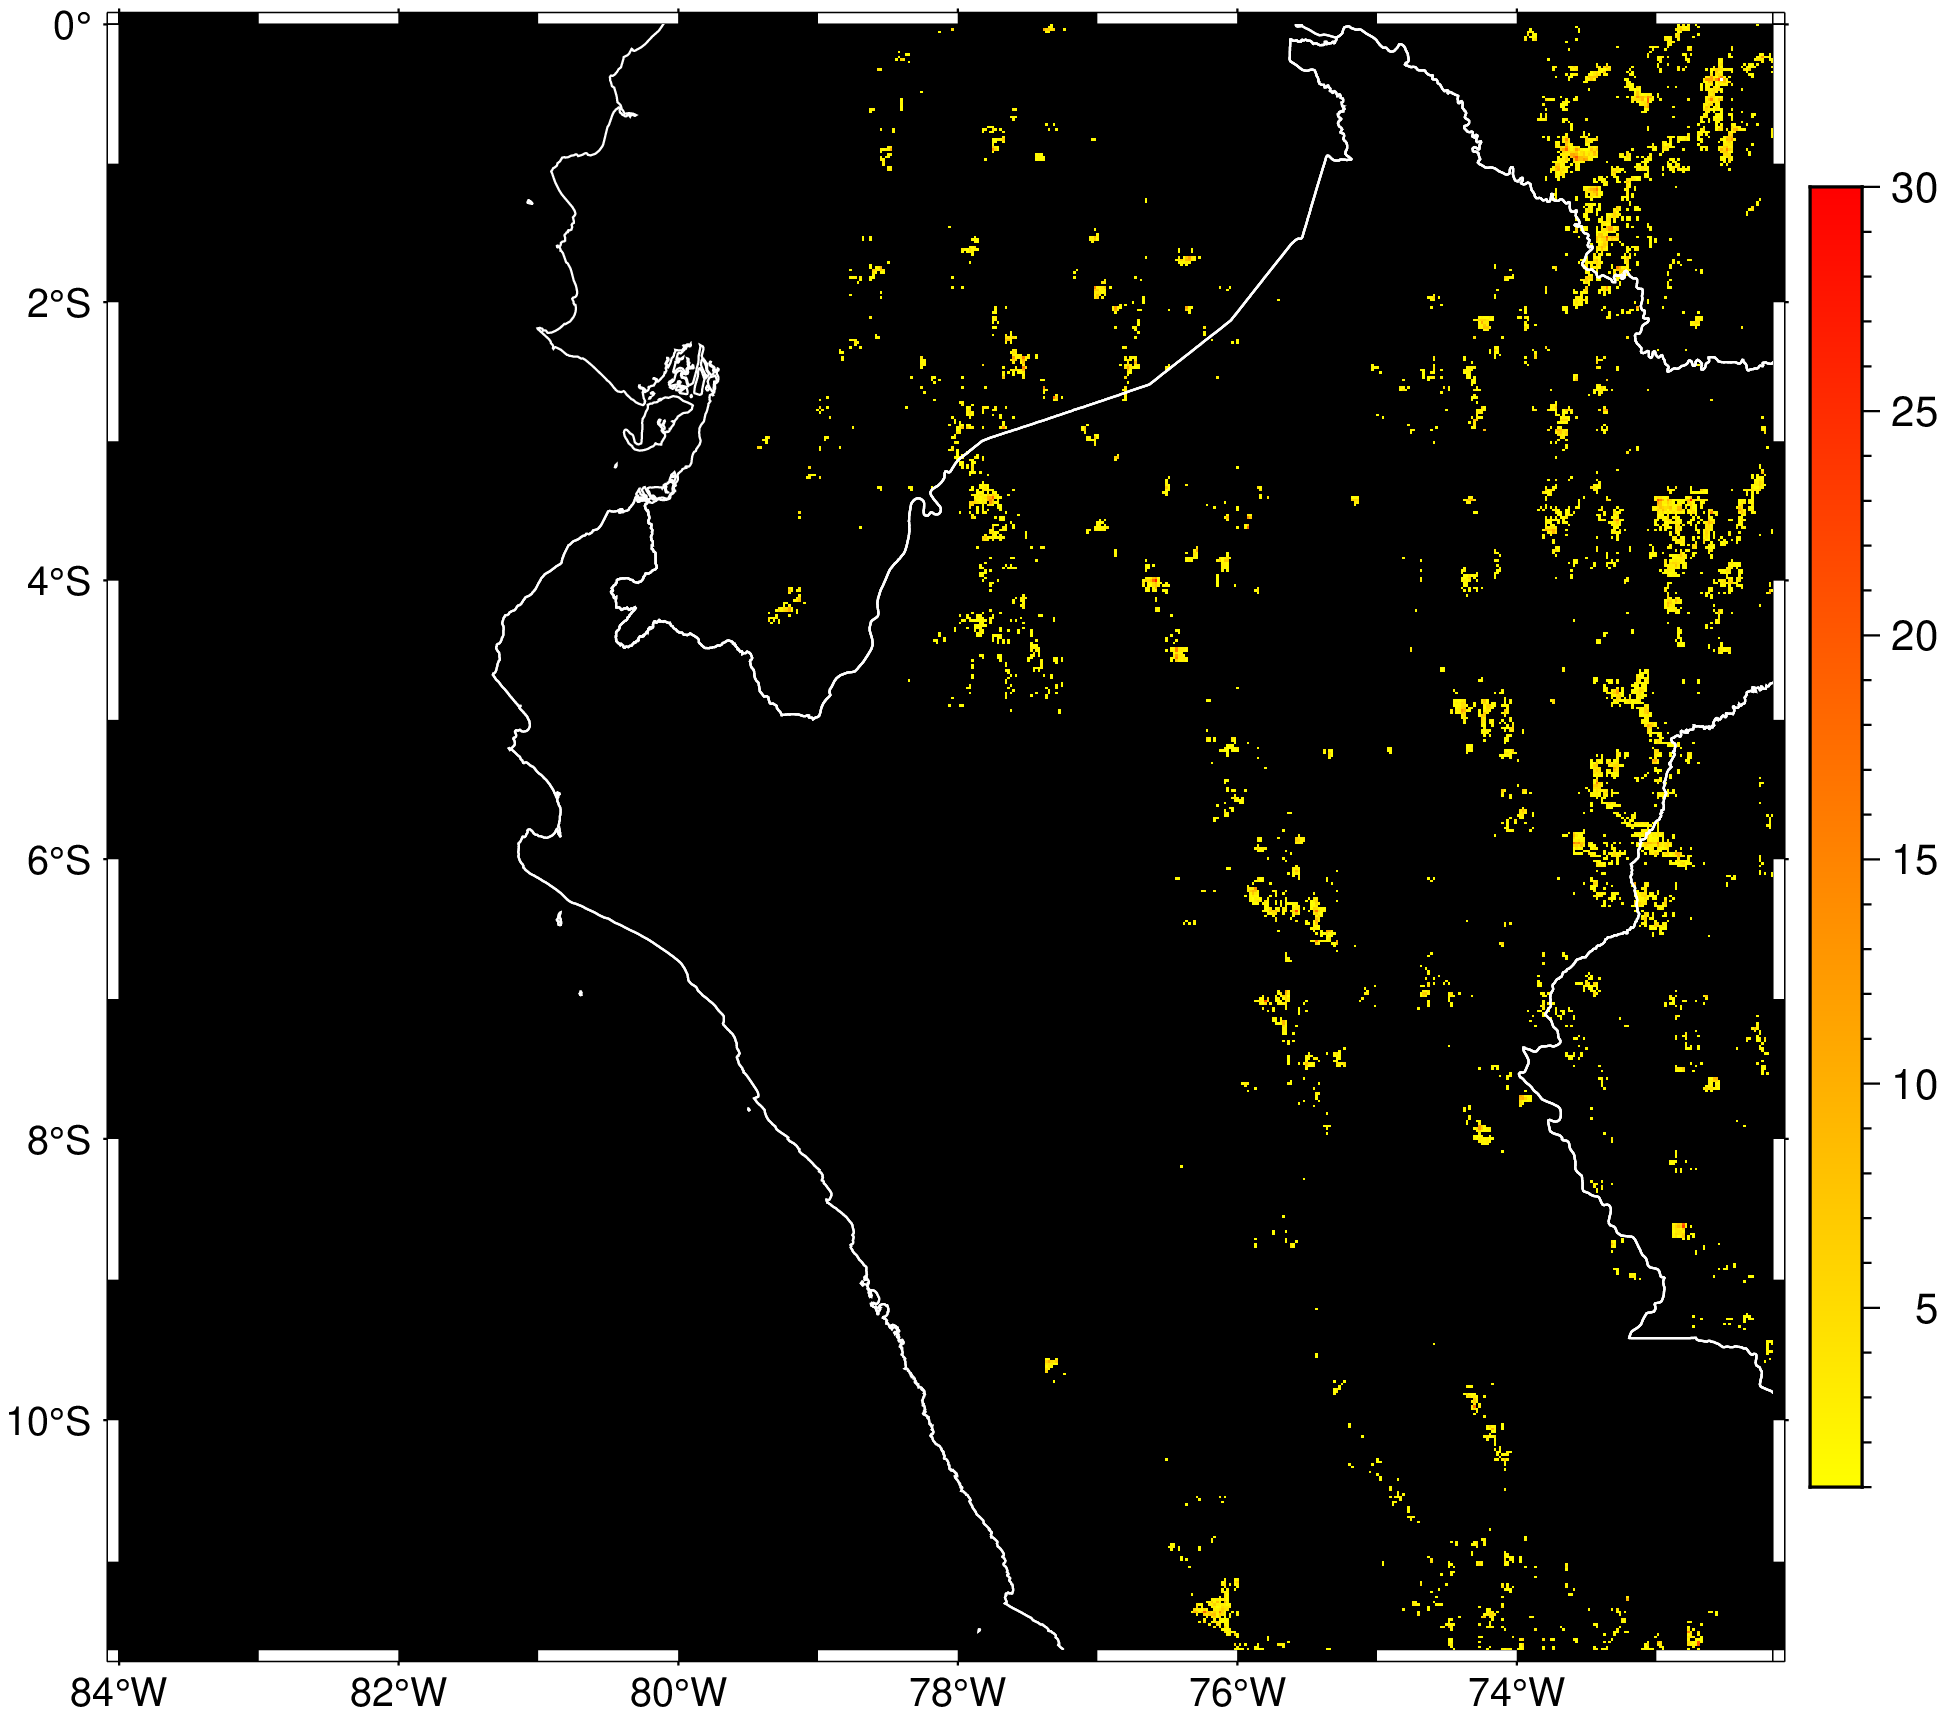

In [20]:
C = (;DCW=((country=:PE,pen=(0.5,:white)), (continent=:SA, pen=(.5, :white))), region=region)
topo = makecpt(color=(:yellow, :red), range=(1, 30), continuous=false)
G2 = mat2grid(grid.grid, x=collect(range(lonini, lonfin, n)), y=collect(range(latini, latfin, n)))
basemap(R=region, proj=:guess)
grdimage!(G2; color=topo, colorbar=true, coast=C, show=true)